Capstone Project - The Battle of the Neighborhoods
Applied Data Science Capstone by IBM/Coursera Table of contents Introduction: Business Problem Data Methodology Analysis Results and Discussion Conclusion

Introduction: Business Problem

Bangalore is the capital and largest city of the Indian state of Karnataka. It is famous for traffic 24/7. With a population of over 13 million (as of 2020), Bangalore is the sixth largest city in India and the fastest changing city in the world.The diversity of the cuisine available is reflective of the social and economic diversity of Bangalore. Roadside vendors, tea stalls, South Indian, North Indian, Arabic food, Chinese and Western fast food are all very popular in the city.It also houses one of the larget vegetarian eating population. So as part of this project ,we will list and visualize all major parts of Bangalore City. This analysis will be useful for connsieaurs of food who are living elsewhere or intend toshifting to Bangalore and will be able to decide the locality they can explore basis their food preferences. The insights obtained from this analysis will also be relevant to existing restaurant owners and to the people planning to open one.

Questions that can be asked using the above mentioned datasets:

a. How popular is online ordering in Bangalore? Is there a relationship between ratings and online ordering option in restaurants?

b. How many restaurants have option to book a table online ? Is there a relationship between ratings and online booking table option in restaurants?

c. Which restaurants have maximum number of venues across the city?

d. Top 10 costliest restaurants in city.

e. Top 10 cheapest restaurants in city.

f. Which location in Bangalore has the highest rated restaurants?

g. Which type of restaurants are most popular in Bangalore?

h. Maximum restaurants of which type are present in each location.

i. Which location in city has maximum and minimum number of restaurants across the city?

j. Which locations in Bangalore are similar in terms of nearby venues?

Data For this project we used the following data :

A. Bangalore Restaurants data that contains list Neighbourhood, Restaurant name, Rating along with their latitude and longitude.

Data source : Kaggle Dataset

Description : This data set contains the required information. And we will use this data set to explore various locality of Bangalore city.

B. Nearby places in each locality of Bangalore city.

Data source : Fousquare API

Description : By using this api, we will get all the venues in each neighbourhood.

C. Neighbourhood coordinates of each locality of Bangalore city.

Data source: Geocoder python

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



Import dataset zomato Bangalore

In [2]:
df = pd.read_csv("E:/zomato/zomato.csv")
df['rating'] = df['rate'].str[:3]
df = df.drop(columns=['rate'])

In [3]:
#Get unique values for each column
len(df['location'].unique())

94

In [4]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [5]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [6]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

# Dropping the NA rows from the dataframe

In [7]:
df=df.dropna(how='all')

In [8]:
k=len(df)
print("Length of actual dataframe is "+ str(k))

Length of actual dataframe is 51717


In [9]:
#Use geopy library to get the latitude and longitude values of Bangalore City locations using Nominatim library
str_locations=df['listed_in(city)'].unique().tolist()

In [10]:
df_location=pd.DataFrame(str_locations)

In [12]:
df_latitude=[]
df_longitude=[]
for i in range(0,len(str_locations)):
    address = 'Bangalore,' + str_locations[i]

    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    df_latitude.append(latitude)
    longitude = location.longitude
    df_longitude.append(longitude)
    print('The geograpical coordinate of Bangalore City in {}, are {}, {}.'.format(str_locations[i],latitude, longitude))

The geograpical coordinate of Bangalore City in Banashankari, are 12.9152208, 77.573598.
The geograpical coordinate of Bangalore City in Bannerghatta Road, are 12.8264929, 77.5864733.
The geograpical coordinate of Bangalore City in Basavanagudi, are 12.9417261, 77.5755021.
The geograpical coordinate of Bangalore City in Bellandur, are 12.9791198, 77.5912997.
The geograpical coordinate of Bangalore City in Brigade Road, are 12.9736132, 77.6074716.
The geograpical coordinate of Bangalore City in Brookefield, are 12.9668213, 77.7168891.
The geograpical coordinate of Bangalore City in BTM, are 12.911275849999999, 77.60456543431182.
The geograpical coordinate of Bangalore City in Church Street, are 12.9742939, 77.6525189.
The geograpical coordinate of Bangalore City in Electronic City, are 12.9791198, 77.5912997.
The geograpical coordinate of Bangalore City in Frazer Town, are 12.996845, 77.6130165.
The geograpical coordinate of Bangalore City in HSR, are 12.91445305, 77.64269383637028.
The

In [13]:
## Combine all these lists into dataframes 
df_coordinates = pd.DataFrame(
    {'location': str_locations,
     'latitude': df_latitude,
     'longitude': df_longitude
    })

In [14]:
df_coordinates

location   latitude  longitude
0            Banashankari  12.915221  77.573598
1       Bannerghatta Road  12.826493  77.586473
2            Basavanagudi  12.941726  77.575502
3               Bellandur  12.979120  77.591300
4            Brigade Road  12.973613  77.607472
5             Brookefield  12.966821  77.716889
6                     BTM  12.911276  77.604565
7           Church Street  12.974294  77.652519
8         Electronic City  12.979120  77.591300
9             Frazer Town  12.996845  77.613017
10                    HSR  12.914453  77.642694
11            Indiranagar  12.973291  77.640467
12              Jayanagar  12.929273  77.582423
13               JP Nagar  12.907251  77.578271
14           Kalyan Nagar  13.022142  77.640337
15           Kammanahalli  13.009346  77.637709
16  Koramangala 4th Block  12.934334  77.630406
17  Koramangala 5th Block  13.292399  77.751926
18  Koramangala 6th Block  13.292399  77.751926
19  Koramangala 7th Block  13.292399  77.751926
20           Lavelle Road  12.974956  77.599728
21           Malleshwaram  13.002735  77.570325
22           Marathahalli  12.955257  77.698416
23                MG Road  12.974185  77.612414
24           New BEL Road  13.017046  77.572693
25       Old Airport Road  12.960670  77.642228
26            Rajajinagar  12.988234  77.554883
27         Residency Road  13.053513  77.623157
28          Sarjapur Road  12.924238  77.628906
29             Whitefield  12.969637  77.749745

In [15]:
df_req=df

In [16]:
## Get the relevant columns
df_req2=df_req[['name','online_order','book_table','rating','location','cuisines','approx_cost(for two people)','listed_in(type)','listed_in(city)','rest_type']]

# Merge the dataframe with the coordinates

In [18]:
final_df=df_req2.merge(df_coordinates,left_on='location',right_on='location')

In [19]:
final_df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
final_df.drop_duplicates(inplace=True)

In [21]:
len(final_df)

39687

# Make relevant data manipulations to get the relevant features¶

In [22]:
final_df_two=final_df

In [ ]:
final_df_two=final_df_two.drop(columns='listed_in(type)')

In [23]:
final_df_two=final_df_two.drop(columns='cuisines')

In [24]:
final_df_two.drop_duplicates(inplace=True)

In [25]:
final_df_three=final_df_two

In [26]:
final_df_three=final_df_three.drop(columns='rating')

In [27]:
final_df_three.drop_duplicates(inplace=True)

In [28]:
final_df_two[final_df_two['name']=='Jalsa']

name online_order book_table rating      location  \
0      Jalsa          Yes        Yes    4.1  Banashankari   
214    Jalsa          Yes        Yes    4.1  Banashankari   
274    Jalsa          Yes        Yes    4.1  Banashankari   
487    Jalsa          Yes        Yes    4.1  Banashankari   
582    Jalsa          Yes        Yes    4.1  Banashankari   
651    Jalsa          Yes        Yes    4.1  Banashankari   
770    Jalsa          Yes        Yes    4.1  Banashankari   
823    Jalsa          Yes        Yes    4.1  Banashankari   
847    Jalsa          Yes        Yes    4.1  Banashankari   
16711  Jalsa          Yes        Yes    4.2  Marathahalli   
17477  Jalsa          Yes        Yes    4.2  Marathahalli   

      approx_cost(for two people) listed_in(type) listed_in(city)  \
0                             800          Buffet    Banashankari   
214                           800        Delivery    Banashankari   
274                           800        Dine-out    Banashankari   
487                           800          Buffet    Basavanagudi   
582                           800        Delivery    Basavanagudi   
651                           800        Dine-out    Basavanagudi   
770                           800          Buffet       Jayanagar   
823                           800        Delivery       Jayanagar   
847                           800        Dine-out       Jayanagar   
16711                       1,500        Delivery     Brookefield   
17477                       1,500        Delivery    Marathahalli   

           rest_type   latitude  longitude  
0      Casual Dining  12.915221  77.573598  
214    Casual Dining  12.915221  77.573598  
274    Casual Dining  12.915221  77.573598  
487    Casual Dining  12.915221  77.573598  
582    Casual Dining  12.915221  77.573598  
651    Casual Dining  12.915221  77.573598  
770    Casual Dining  12.915221  77.573598  
823    Casual Dining  12.915221  77.573598  
847    Casual Dining  12.915221  77.573598  
16711  Casual Dining  12.955257  77.698416  
17477  Casual Dining  12.955257  77.698416

In [29]:
final_df_three.head()

name online_order book_table      location  \
0                  Jalsa          Yes        Yes  Banashankari   
1         Spice Elephant          Yes         No  Banashankari   
2        San Churro Cafe          Yes         No  Banashankari   
3  Addhuri Udupi Bhojana           No         No  Banashankari   
4                 Onesta          Yes        Yes  Banashankari   

  approx_cost(for two people) listed_in(type) listed_in(city)  \
0                         800          Buffet    Banashankari   
1                         800          Buffet    Banashankari   
2                         800          Buffet    Banashankari   
3                         300          Buffet    Banashankari   
4                         600           Cafes    Banashankari   

             rest_type   latitude  longitude  
0        Casual Dining  12.915221  77.573598  
1        Casual Dining  12.915221  77.573598  
2  Cafe, Casual Dining  12.915221  77.573598  
3          Quick Bites  12.915221  77.573598  
4  Casual Dining, Cafe  12.915221  77.573598

# Methodology 
In this project we will direct our efforts on analyzing different areas of Bangalore and getting answers to the questions like which places are best for foodies to live in, how much is the popularity of online ordering option in Bangalore, how are the ratings and customer experience through table bookings on Zomato linked, which restaurants are cheapest, costliest etc.

In first step we have collected the required data: Bangalore restaurants data source Zomato from Kaggle dataset . Location and type (category) of venues around each location in Bangalore through Foursquare API. Coordinates for each location from Geocoder Python.

Second step in our analysis will be exploration of restaurants in different areas of Bangalore.We will use different visualizations to get insights on the best places for foodies, various options to choose basis the budget and popularity of online ordering option and bookings option and how they are related to better user experience.

In third and final step we will focus on different areas and within those create clusters of locations that have similar type of neighbouring venues.We will present map of all such locations and create clusters (using k-means clustering) of those locations to identify similar neighborhoods and generate insights.

# ##Analysis
##Calculation of Total restaurants in Bangalore in our dataset

In [30]:
total_res=len(final_df_three['name'].unique())
print(total_res)

6884


Number of restaurants in Bangalore with Online ordering option

In [32]:
## Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [33]:
online_df=final_df_three

In [34]:
online_df=online_df[['name','online_order','book_table','listed_in(city)']]

In [35]:
online_df.drop_duplicates()

name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                                 Onesta          Yes   
5                                         Penthouse Cafe          Yes   
6                                              Smacznego          Yes   
7      CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...          Yes   
8                                           Cafe Shuffle          Yes   
9                                       The Coffee Shack          Yes   
10                                            Caf-Eleven           No   
12                                         Cafe Vivacity          Yes   
13                                          Catch-up-ino          Yes   
14                                      Kirthi's Biryani          Yes   
15                                              T3H Cafe           No   
16                         360 Atoms Restaurant And Cafe          Yes   
17                                      The Vintage Cafe          Yes   
18                                          Woodee Pizza          Yes   
19                                       Cafe Coffee Day           No   
20                                          My Tea House          Yes   
21                                         Hide Out Cafe           No   
22                                             CAFE NOVA           No   
23                                          Coffee Tindi          Yes   
24                                        Sea Green Cafe           No   
25                                                 Cuppa           No   
26                                            Foodiction          Yes   
27                                           Sweet Truth          Yes   
28                                       Ovenstory Pizza          Yes   
29                                                Faasos          Yes   
30                                       Behrouz Biryani          Yes   
31                                        Fast And Fresh          Yes   
32                                       Szechuan Dragon          Yes   
33                          Maruthi Davangere Benne Dosa          Yes   
34                                          Havyaka Mess           No   
35                                            McDonald's          Yes   
36                                        Domino's Pizza          Yes   
38                                              Hotboxit           No   
39                                                 Petoo           No   
40                                Corner House Ice Cream           No   
41                                          Roving Feast           No   
42                                             FreshMenu          Yes   
43                           Banashankari Donne Biriyani          Yes   
44                                                Wamama          Yes   
45                                     Five Star Chicken           No   
46                                     XO Belgian Waffle          Yes   
47                                         Peppy Peppers           No   
48                                                  1947           No   
49                                       Cake of the Day           No   
50                                    Gustoes Beer House           No   
51                                            Sugar Rush           No   
52                                         The Good Bowl          Yes   
53                                      The Biryani Cafe           No   
54                                         Spicy Tandoor           No   
55                                              LSD Cafe           No   
56                                   

In [37]:
online_df_req=online_df[['name','online_order']]

In [38]:
online_df_req.drop_duplicates(inplace=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
online_df.head()

name online_order book_table listed_in(city)
0                  Jalsa          Yes        Yes    Banashankari
1         Spice Elephant          Yes         No    Banashankari
2        San Churro Cafe          Yes         No    Banashankari
3  Addhuri Udupi Bhojana           No         No    Banashankari
4                 Onesta          Yes        Yes    Banashankari

In [40]:
online_df_req=online_df.groupby('name')['online_order'].sum().reset_index()

In [41]:
online_df_req.head()

name                 online_order
0   #FeelTheROLL                         NoNo
1     #L-81 Cafe  YesYesYesYesYesYesYesYesYes
2  #Vibes Restro                       NoNoNo
3        #refuel                    YesYesYes
4    1 Fahreheit                           No

In [42]:
online_df_req['online_order'][1]

'YesYesYesYesYesYesYesYesYes'

In [43]:
online_df_req["online_order"]=online_df_req["online_order"].apply(lambda x: 'No' if (x.find("Yes")) else ('Yes'))

In [44]:
online_res=len(online_df_req[online_df_req['online_order']=='Yes'])

In [45]:
len(online_df_req[online_df_req['online_order']=='No'])

3581

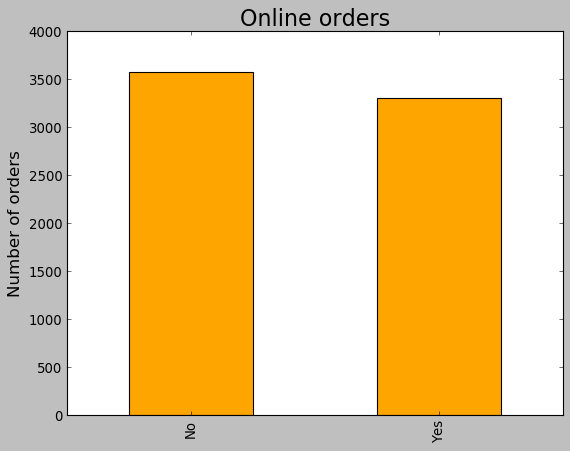

In [46]:
plt.rcParams['figure.figsize'] = (3, 4)
plt.style.use('_classic_test')
online_df_req['online_order'].value_counts().plot.bar(color = 'orange')
plt.title('Online orders', fontsize = 20)
plt.ylabel('Number of orders', fontsize = 15)
plt.show()

# Insight: 48% restaurants in Bangalore have online ordering option
Percentage of restaurants with Online option¶

In [48]:
online_df2=final_df_two[['name','online_order','book_table','rating','listed_in(city)']]

In [49]:
online_df2.drop_duplicates(inplace=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
online_df2.to_csv("E:/v1.csv")

In [51]:
online_df_req.to_csv("E:/v2.csv")

In [52]:
final_df_three.to_csv("E:/v3.csv")

In [53]:
final_df_two.to_csv("E:/v4.csv")

In [ ]:
df_coordinates.to_csv("E:/v5.csv")

In [1]:
import pandas as pd
import numpy as np

In [59]:
online_df2=pd.read_csv("E:/v1.csv")

In [60]:
online_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25738 entries, 0 to 25737
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25738 non-null  int64 
 1   name             25738 non-null  object
 2   online_order     25738 non-null  object
 3   book_table       25738 non-null  object
 4   rating           21792 non-null  object
 5   listed_in(city)  25738 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [61]:
online_df2=online_df2[online_df2['rating'].notna()]

In [62]:
online_df2

Unnamed: 0                   name online_order book_table rating  \
0               0                  Jalsa          Yes        Yes    4.1   
1               1         Spice Elephant          Yes         No    4.1   
2               2        San Churro Cafe          Yes         No    3.8   
3               3  Addhuri Udupi Bhojana           No         No    3.7   
4               4                 Onesta          Yes        Yes    4.6   
...           ...                    ...          ...        ...    ...   
25725       39728     New Delhi Dharbaar           No         No    NEW   
25727       39733    Sree Ayyappaa Foods           No         No    NEW   
25734       39749      Five Star Chicken          Yes         No    3.7   
25736       39757     Donne Biryani Mane          Yes         No    3.8   
25737       39773        Biriyani Nights          Yes         No    3.2   

      listed_in(city)  
0        Banashankari  
1        Banashankari  
2        Banashankari  
3        Banashankari  
4        Banashankari  
...               ...  
25725    New BEL Road  
25727    New BEL Road  
25734    New BEL Road  
25736    New BEL Road  
25737     Rajajinagar  

[21792 rows x 6 columns]

In [63]:
online_df2=online_df2[online_df2['rating'] != '-']

In [64]:
online_df2=online_df2[online_df2['rating'] != 'NEW']

In [65]:
online_df2

Unnamed: 0                   name online_order book_table rating  \
0               0                  Jalsa          Yes        Yes    4.1   
1               1         Spice Elephant          Yes         No    4.1   
2               2        San Churro Cafe          Yes         No    3.8   
3               3  Addhuri Udupi Bhojana           No         No    3.7   
4               4                 Onesta          Yes        Yes    4.6   
...           ...                    ...          ...        ...    ...   
25722       39722       Kolkata Hot Roll          Yes         No    3.4   
25723       39725               Sun Cafe           No         No    3.3   
25734       39749      Five Star Chicken          Yes         No    3.7   
25736       39757     Donne Biryani Mane          Yes         No    3.8   
25737       39773        Biriyani Nights          Yes         No    3.2   

      listed_in(city)  
0        Banashankari  
1        Banashankari  
2        Banashankari  
3        Banashankari  
4        Banashankari  
...               ...  
25722    New BEL Road  
25723    New BEL Road  
25734    New BEL Road  
25736    New BEL Road  
25737     Rajajinagar  

[20536 rows x 6 columns]

In [67]:
online_df2['rating'] = online_df2['rating'].astype(float)

In [68]:
grouped_df = online_df2.groupby("name")["rating"]

v1=pd.DataFrame(grouped_df.mean().reset_index(name = "rate"))

In [69]:
v1

name      rate
0                             #FeelTheROLL  3.400000
1                               #L-81 Cafe  3.900000
2                                  #refuel  3.700000
3                                 1000 B.C  3.200000
4     100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C  3.700000
...                                    ...       ...
5243                            de Ranthal  3.800000
5244                               eat.fit  4.388235
5245            i-Bar - The Park Bangalore  3.800000
5246                     iSpice Resto Cafe  3.700000
5247                               nu.tree  4.314286

[5248 rows x 2 columns]

In [70]:
online_df_req= pd.read_csv("E:/v2.csv")

In [72]:
online_df_req

Unnamed: 0               name online_order
0              0       #FeelTheROLL           No
1              1         #L-81 Cafe          Yes
2              2      #Vibes Restro           No
3              3            #refuel          Yes
4              4        1 Fahreheit           No
...          ...                ...          ...
6879        6879  iSpice Resto Cafe          Yes
6880        6880            late100           No
6881        6881            nu.tree           No
6882        6882         repEAT Hub           No
6883        6883          sCoolMeal           No

[6884 rows x 3 columns]

In [73]:
online_df_req=online_df_req.merge(v1,left_on='name',right_on='name')

In [74]:
online_df_req

Unnamed: 0                                  name online_order      rate
0              0                          #FeelTheROLL           No  3.400000
1              1                            #L-81 Cafe          Yes  3.900000
2              3                               #refuel          Yes  3.700000
3              5                              1000 B.C          Yes  3.200000
4              6  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C           No  3.700000
...          ...                                   ...          ...       ...
5243        6875                            de Ranthal           No  3.800000
5244        6876                               eat.fit          Yes  4.388235
5245        6877            i-Bar - The Park Bangalore           No  3.800000
5246        6879                     iSpice Resto Cafe          Yes  3.700000
5247        6881                               nu.tree           No  4.314286

[5248 rows x 4 columns]

In [75]:
online_df_req['rate'].unique()

array([3.4       , 3.9       , 3.7       , 3.2       , 3.7       ,
       3.5       , 4.5       , 4.1       , 4.21428571, 4.1       ,
       4.02      , 3.1       , 4.        , 3.6       , 3.3       ,
       2.95      , 3.7       , 4.2       , 3.66      , 4.42      ,
       3.        , 3.2       , 3.65      , 3.8       , 3.74285714,
       4.3       , 3.8       , 4.05      , 2.7       , 2.8       ,
       4.35555556, 3.30689655, 2.775     , 4.79090909, 3.32857143,
       4.4       , 4.45      , 3.3       , 3.38333333, 3.25      ,
       3.88333333, 3.76666667, 3.23333333, 3.45555556, 3.48      ,
       3.58      , 2.9       , 3.68333333, 3.65      , 4.025     ,
       3.55      , 3.93333333, 3.05      , 3.4       , 3.26666667,
       3.475     , 3.43333333, 3.82857143, 3.35      , 3.8625    ,
       4.425     , 4.3       , 3.56666667, 1.8       , 3.6       ,
       3.825     , 4.13333333, 3.86666667, 3.03333333, 3.375     ,
       3.16      , 3.3       , 3.1875    , 3.32727273, 3.52352

In [76]:
online_df_req["rate"]=online_df_req["rate"].apply(lambda x: round(x,1))

In [77]:
online_df_req

Unnamed: 0                                  name online_order  rate
0              0                          #FeelTheROLL           No   3.4
1              1                            #L-81 Cafe          Yes   3.9
2              3                               #refuel          Yes   3.7
3              5                              1000 B.C          Yes   3.2
4              6  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C           No   3.7
...          ...                                   ...          ...   ...
5243        6875                            de Ranthal           No   3.8
5244        6876                               eat.fit          Yes   4.4
5245        6877            i-Bar - The Park Bangalore           No   3.8
5246        6879                     iSpice Resto Cafe          Yes   3.7
5247        6881                               nu.tree           No   4.3

[5248 rows x 4 columns]

In [78]:
online_df_req['rate'].unique()

array([3.4, 3.9, 3.7, 3.2, 3.5, 4.5, 4.1, 4.2, 4. , 3.1, 3.6, 3.3, 3. ,
       4.4, 3.8, 4.3, 2.7, 2.8, 4.8, 2.9, 1.8, 2.6, 4.9, 4.6, 2.2, 2.3,
       4.7, 2.5, 2.1, 2. , 2.4])

Relationship between online ordering and ratings

In [80]:
## Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

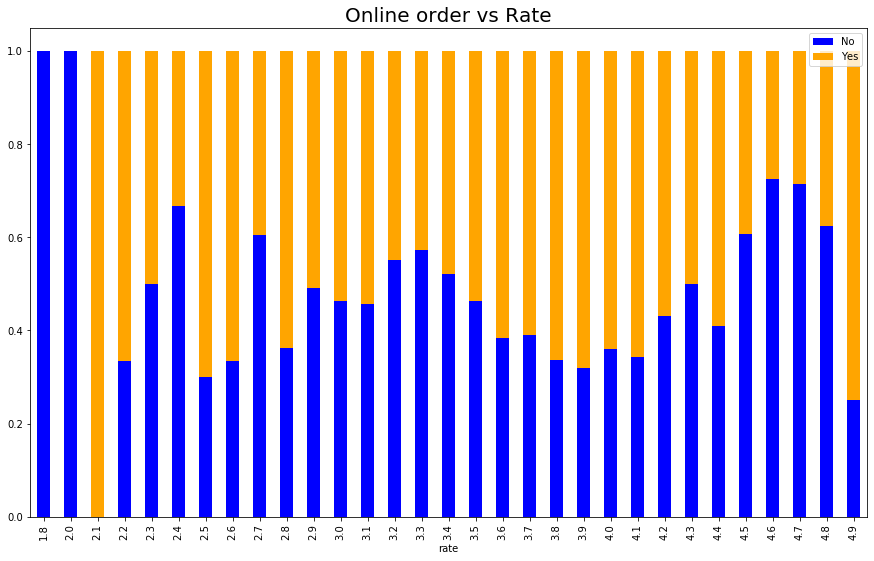

In [83]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(online_df_req['rate'], online_df_req['online_order'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['blue','orange'])
plt.title('Online order vs Rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

# Number of restaurants in Bangalore with Booking table option available on Zomato

In [84]:
book_res=len(final_df_three[final_df_three['book_table']=='Yes']['name'].unique())
print(book_res)

NameError: name 'final_df_three' is not defined

In [85]:
final_df_three=pd.read_csv("E:/v3.csv")

In [86]:
book_res=len(final_df_three[final_df_three['book_table']=='Yes']['name'].unique())
print(book_res)

688


In [87]:
final_df_three.head()

Unnamed: 0                   name online_order book_table      location  \
0           0                  Jalsa          Yes        Yes  Banashankari   
1           1         Spice Elephant          Yes         No  Banashankari   
2           2        San Churro Cafe          Yes         No  Banashankari   
3           3  Addhuri Udupi Bhojana           No         No  Banashankari   
4           4                 Onesta          Yes        Yes  Banashankari   

  approx_cost(for two people) listed_in(city)            rest_type   latitude  \
0                         800    Banashankari        Casual Dining  12.915221   
1                         800    Banashankari        Casual Dining  12.915221   
2                         800    Banashankari  Cafe, Casual Dining  12.915221   
3                         300    Banashankari          Quick Bites  12.915221   
4                         600    Banashankari  Casual Dining, Cafe  12.915221   

   longitude  
0  77.573598  
1  77.573598  
2  77.573598  
3  77.573598  
4  77.573598

In [105]:
booking_df=final_df_three[['name','book_table']]
booking_df.head()

name book_table
0                  Jalsa        Yes
1         Spice Elephant         No
2        San Churro Cafe         No
3  Addhuri Udupi Bhojana         No
4                 Onesta        Yes

In [106]:
booking_df.drop_duplicates(inplace=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
booking_df=booking_df.groupby('name')['book_table'].sum().reset_index()
booking_df.head()

name book_table
0   #FeelTheROLL         No
1     #L-81 Cafe         No
2  #Vibes Restro         No
3        #refuel         No
4    1 Fahreheit         No

In [91]:
booking_df["book_table"]=booking_df["book_table"].apply(lambda x: 'No' if (x.find("Yes")) else ('Yes'))

In [92]:
len(booking_df)

6884

In [93]:
book_yes=len(booking_df[booking_df['book_table']=='Yes'])
print(book_yes)

639


# Insight: 9.2% restaurants in Bangalore have booking option available on Zomato

Percentage of restaurants with Booking option

In [96]:
total_res=len(final_df_three['name'].unique())

In [97]:
(book_yes/total_res)*100

9.282393957001743

# Relationship between booking table online and ratings

In [108]:
booking_df

name book_table
0          #FeelTheROLL         No
1            #L-81 Cafe         No
2         #Vibes Restro         No
3               #refuel         No
4           1 Fahreheit         No
...                 ...        ...
6879  iSpice Resto Cafe         No
6880            late100         No
6881            nu.tree         No
6882         repEAT Hub         No
6883          sCoolMeal         No

[6884 rows x 2 columns]

In [129]:
online_df_req

Unnamed: 0                                  name online_order  rate
0              0                          #FeelTheROLL           No   3.4
1              1                            #L-81 Cafe          Yes   3.9
2              3                               #refuel          Yes   3.7
3              5                              1000 B.C          Yes   3.2
4              6  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C           No   3.7
...          ...                                   ...          ...   ...
5243        6875                            de Ranthal           No   3.8
5244        6876                               eat.fit          Yes   4.4
5245        6877            i-Bar - The Park Bangalore           No   3.8
5246        6879                     iSpice Resto Cafe          Yes   3.7
5247        6881                               nu.tree           No   4.3

[5248 rows x 4 columns]

In [130]:
online_df4=online_df_req

In [131]:
online_df4

Unnamed: 0                                  name online_order  rate
0              0                          #FeelTheROLL           No   3.4
1              1                            #L-81 Cafe          Yes   3.9
2              3                               #refuel          Yes   3.7
3              5                              1000 B.C          Yes   3.2
4              6  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C           No   3.7
...          ...                                   ...          ...   ...
5243        6875                            de Ranthal           No   3.8
5244        6876                               eat.fit          Yes   4.4
5245        6877            i-Bar - The Park Bangalore           No   3.8
5246        6879                     iSpice Resto Cafe          Yes   3.7
5247        6881                               nu.tree           No   4.3

[5248 rows x 4 columns]

In [132]:
booking_df_req=booking_df.merge(online_df4,left_on='name',right_on='name')

In [133]:
booking_df_req

name book_table  Unnamed: 0  \
0                             #FeelTheROLL         No           0   
1                               #L-81 Cafe         No           1   
2                                  #refuel         No           3   
3                                 1000 B.C         No           5   
4     100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C         No           6   
...                                    ...        ...         ...   
5243                            de Ranthal         No        6875   
5244                               eat.fit      NoYes        6876   
5245            i-Bar - The Park Bangalore         No        6877   
5246                     iSpice Resto Cafe         No        6879   
5247                               nu.tree         No        6881   

     online_order  rate  
0              No   3.4  
1             Yes   3.9  
2             Yes   3.7  
3             Yes   3.2  
4              No   3.7  
...           ...   ...  
5243           No   3.8  
5244          Yes   4.4  
5245           No   3.8  
5246          Yes   3.7  
5247           No   4.3  

[5248 rows x 5 columns]

In [134]:
booking_df_req["rate"]=booking_df_req["rate"].apply(lambda x: round(x,1))

In [135]:
booking_df_req.head()

name book_table  Unnamed: 0 online_order  \
0                          #FeelTheROLL         No           0           No   
1                            #L-81 Cafe         No           1          Yes   
2                               #refuel         No           3          Yes   
3                              1000 B.C         No           5          Yes   
4  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C         No           6           No   

   rate  
0   3.4  
1   3.9  
2   3.7  
3   3.2  
4   3.7

# Insights: Higher rated restaurants have booking option availabe which is one of reason for that rating because of better customer experience

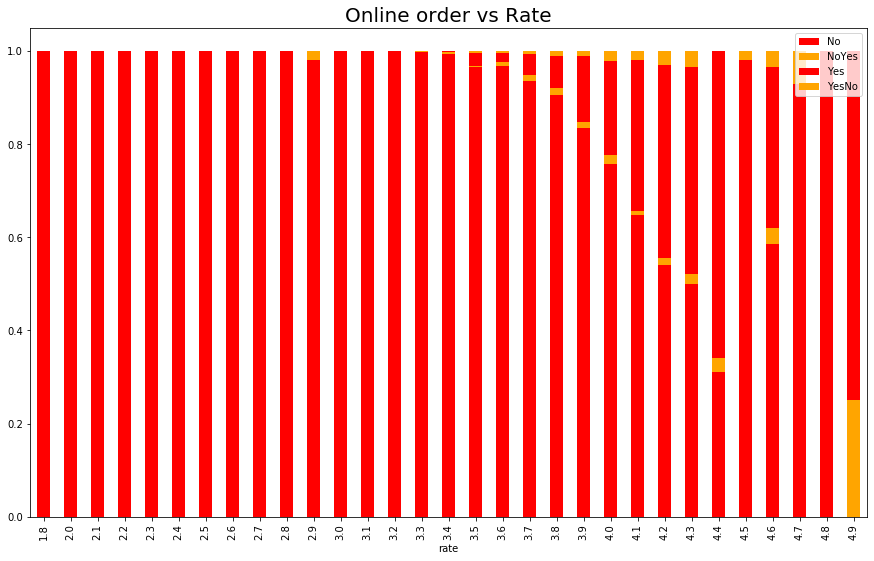

In [136]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(booking_df_req['rate'], booking_df_req['book_table'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','Orange'])
plt.title('Online order vs Rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

### Maximum venues in Banaglore are of Cafe Coffee Day

In [138]:
final_df_three.head()

Unnamed: 0                   name online_order book_table      location  \
0           0                  Jalsa          Yes        Yes  Banashankari   
1           1         Spice Elephant          Yes         No  Banashankari   
2           2        San Churro Cafe          Yes         No  Banashankari   
3           3  Addhuri Udupi Bhojana           No         No  Banashankari   
4           4                 Onesta          Yes        Yes  Banashankari   

  approx_cost(for two people) listed_in(city)            rest_type   latitude  \
0                         800    Banashankari        Casual Dining  12.915221   
1                         800    Banashankari        Casual Dining  12.915221   
2                         800    Banashankari  Cafe, Casual Dining  12.915221   
3                         300    Banashankari          Quick Bites  12.915221   
4                         600    Banashankari  Casual Dining, Cafe  12.915221   

   longitude  
0  77.573598  
1  77.573598  
2  77.573598  
3  77.573598  
4  77.573598

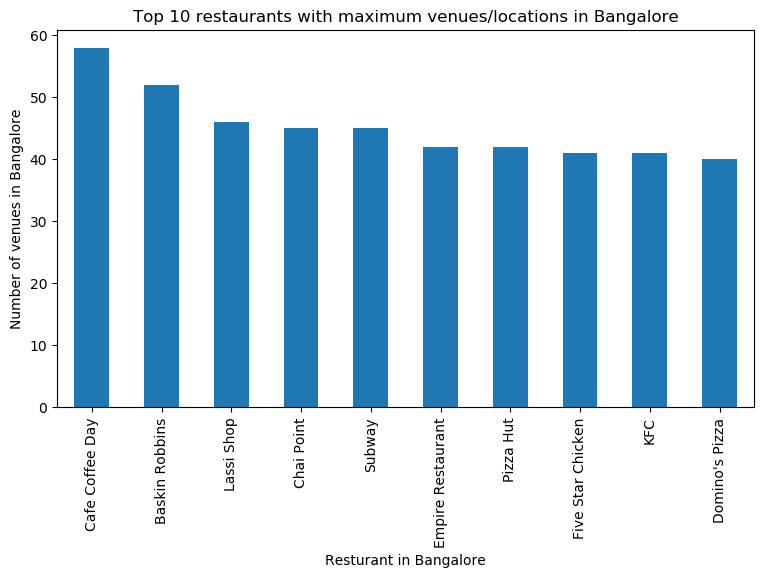

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Top 10 restaurants with maximum venues/locations in Bangalore')
#On x-axis
final_df_three.groupby('name')['location'].count().nlargest(10).plot(kind='bar')
plt.xlabel('Resturant in Bangalore')
#On y-axis
plt.ylabel('Number of venues in Bangalore')
#displays the plot
plt.show()

# Restaurants costliest in Bangalore

In [141]:
type(final_df_three['approx_cost(for two people)'][0])

str

In [142]:
final_df_three['approx_cost(for two people)']=final_df_three['approx_cost(for two people)'].apply(lambda x:str(x))


In [143]:
final_df_three['approx_cost(for two people)']=final_df_three['approx_cost(for two people)'].apply(lambda x:x.replace(',',''))

In [144]:
final_df_three['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '1200', '350', '100', '250',
       '950', '1000', '1300', '80', '1100', '160', '2200', '1500', '1350',
       '1700', 'nan', '1600', '1400', '180', '50', '190', '230', '130',
       '120', '70', '3000', '2000', '1800', '60', '2500', '560', '1250',
       '2700', '4500', '1900', '2100', '330', '2400', '1450', '3500',
       '40', '4000', '6000', '240', '2800', '3400', '2600', '2300',
       '1650'], dtype=object)

In [145]:
final_df_three_cost=final_df_three[final_df_three['approx_cost(for two people)']!='nan']

In [147]:
final_df_three_cost['approx_cost(for two people)']=final_df_three_cost['approx_cost(for two people)'].apply(lambda x:int(x))


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
df_costliestvenues=final_df_three_cost.groupby('name')['approx_cost(for two people)'].mean().reset_index()

In [149]:
df_costliestvenues[df_costliestvenues['approx_cost(for two people)']==df_costliestvenues['approx_cost(for two people)'].max()]

name  approx_cost(for two people)
3436  Le Cirque Signature - The Leela Palace                       6000.0

In [150]:
df_costliestvenues=df_costliestvenues.set_index('name')

# The Leela Palace is the costliest Restaurant in Bangalore

In [152]:
final_df_three['approx_cost(for two people)'].head()

0    800
1    800
2    800
3    300
4    600
Name: approx_cost(for two people), dtype: object

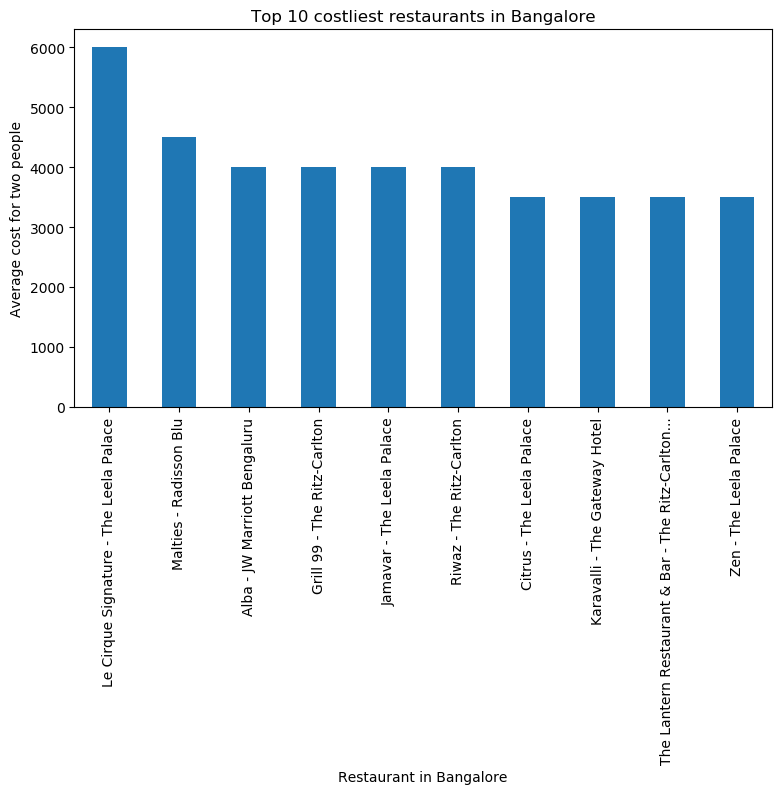

In [153]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Top 10 costliest restaurants in Bangalore')
#On x-axis
#final_df_three.groupby('name')['approx_cost(for two people)'].mean().nlargest(10).plot(kind='bar')
df_costliestvenues['approx_cost(for two people)'].nlargest(10).plot(kind='bar')
plt.xlabel('Restaurant in Bangalore')
#On y-axis
plt.ylabel('Average cost for two people')
#displays the plot
plt.show()

# Cheapest resturants in Bangalore

# Cheapest is bread and better

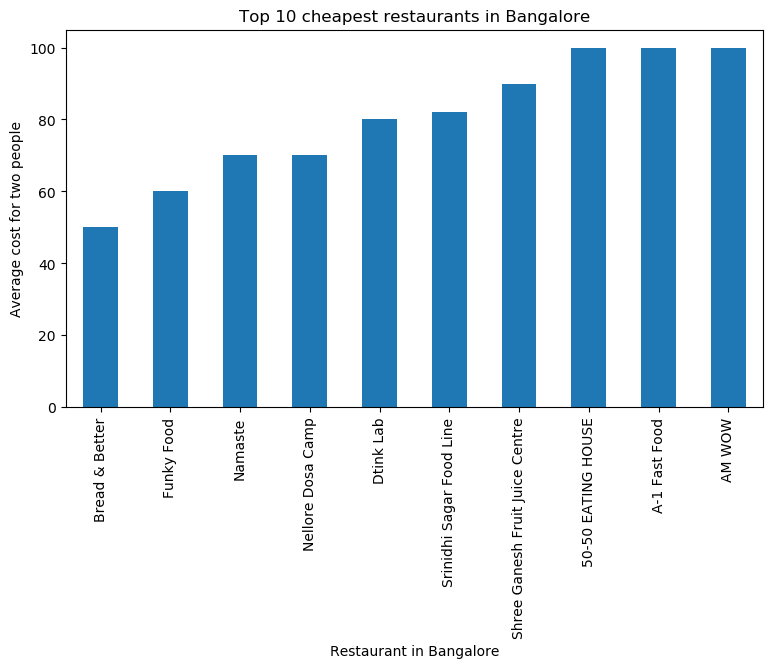

In [155]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Top 10 cheapest restaurants in Bangalore')
#On x-axis
#final_df_three.groupby('name')['approx_cost(for two people)'].mean().nlargest(10).plot(kind='bar')
df_costliestvenues['approx_cost(for two people)'].nsmallest(10).plot(kind='bar')
plt.xlabel('Restaurant in Bangalore')
#On y-axis
plt.ylabel('Average cost for two people')
#displays the plot
plt.show()

# Rating comparisons

In [179]:
final_df_two=pd.read_csv("E:/v4.csv")

In [181]:
final_df_two[final_df_two['name']=='Jalsa']

Unnamed: 0   name online_order book_table rate      location  \
0               0  Jalsa          Yes        Yes  4.1  Banashankari   
290           487  Jalsa          Yes        Yes  4.1  Banashankari   
472           770  Jalsa          Yes        Yes  4.1  Banashankari   
11772       16711  Jalsa          Yes        Yes  4.2  Marathahalli   
12374       17477  Jalsa          Yes        Yes  4.2  Marathahalli   

      approx_cost(for two people) listed_in(city)      rest_type   latitude  \
0                             800    Banashankari  Casual Dining  12.915221   
290                           800    Basavanagudi  Casual Dining  12.915221   
472                           800       Jayanagar  Casual Dining  12.915221   
11772                       1,500     Brookefield  Casual Dining  12.955257   
12374                       1,500    Marathahalli  Casual Dining  12.955257   

       longitude  
0      77.573598  
290    77.573598  
472    77.573598  
11772  77.698416  
12374  77.698416

In [182]:
final_df_two=final_df_two[final_df_two['rate']!final_df_two['rate'].unique()='N']

In [183]:
final_df_two['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4', '4.2', '3.9', '3.1', '3', '3.6',
       '3.2', '3.3', '2.8', '4.3', 'NEW', '2.9', '3.5', nan, '2.6', '3.4',
       '2.5', '2.7', '4.4', '4.7', '4.5', '4.8', '-', '2.3', '2.4', '2.2',
       '4.9', '2.1', '2', '1.8'], dtype=object)

In [184]:
final_df_two['rate']=final_df_two['rate'].apply(lambda x:float(x))

ValueError: could not convert string to float: 'NEW'

In [185]:
final_df_two=final_df_two[final_df_two['rate'] != 'NEW']

In [186]:
final_df_two['rate']=final_df_two['rate'].apply(lambda x:float(x))

ValueError: could not convert string to float: '-'

In [187]:
final_df_two=final_df_two[final_df_two['rate'] != '-']

In [188]:
final_df_two['rate']=final_df_two['rate'].apply(lambda x:float(x))

# Highest rated restaurants are in Lavelle road

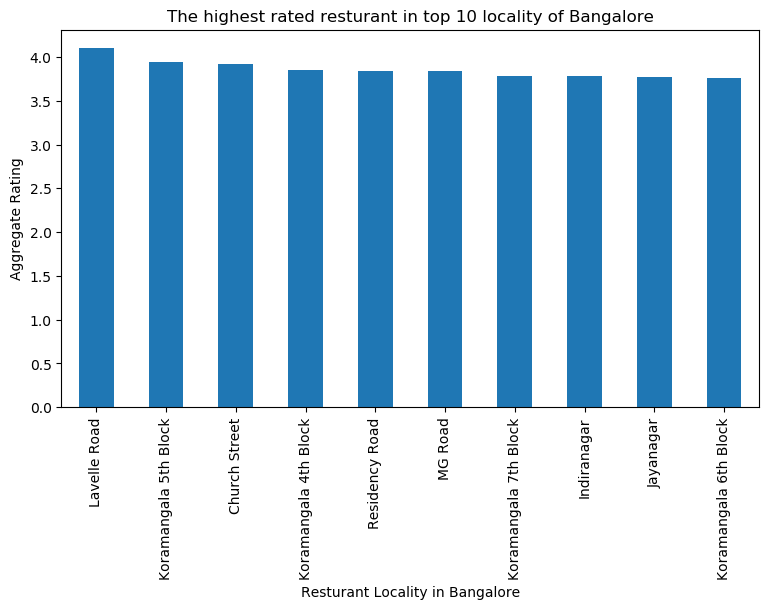

In [190]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Bangalore')
#On x-axis
final_df_two.groupby('location')['rate'].mean().nlargest(10).plot(kind='bar')
plt.xlabel('Resturant Locality in Bangalore')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

In [191]:
## Create map to show restaurant clusters basis locations

In [192]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude value

Solving environment: ...working... done

# All requested packages already installed.



In [193]:
address = 'Bangalore, City'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangalore City, are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bangalore City, are 12.9791198, 77.5912997.


In [195]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium

Solving environment: ...working... done

# All requested packages already installed.



In [196]:
Bangalore_Rest = folium.Map(location=[12.98, 77.60], zoom_start=12)

In [197]:
print(Bangalore_Rest)

In [198]:
X=final_df_two['latitude']
#print(X)

In [199]:
Y=final_df_two['longitude']
#print(Y)

In [200]:
Z = np.stack((X, Y), axis=1)
print(Z)

[[12.9152208 77.573598 ]
 [12.9152208 77.573598 ]
 [12.9152208 77.573598 ]
 ...
 [13.0170461 77.5726933]
 [13.0170461 77.5726933]
 [13.0170461 77.5726933]]


In [204]:
from sklearn.cluster import KMeans

In [205]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
final_df_two ['Cluster'] = clusters

In [ ]:
for latitude, longitude, Locality, cluster in zip(final_df_two['latitude'], 
    final_df_two['longitude'], final_df_two['listed_in(city)'], final_df_two['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Bangalore_Rest)  

In [ ]:
Bangalore_Rest 

In [211]:
##Calculate the maximum number of restaurants are of which type
final_df_three.head()

Unnamed: 0                   name online_order book_table      location  \
0           0                  Jalsa          Yes        Yes  Banashankari   
1           1         Spice Elephant          Yes         No  Banashankari   
2           2        San Churro Cafe          Yes         No  Banashankari   
3           3  Addhuri Udupi Bhojana           No         No  Banashankari   
4           4                 Onesta          Yes        Yes  Banashankari   

  approx_cost(for two people) listed_in(city)            rest_type   latitude  \
0                         800    Banashankari        Casual Dining  12.915221   
1                         800    Banashankari        Casual Dining  12.915221   
2                         800    Banashankari  Cafe, Casual Dining  12.915221   
3                         300    Banashankari          Quick Bites  12.915221   
4                         600    Banashankari  Casual Dining, Cafe  12.915221   

   longitude  
0  77.573598  
1  77.573598  
2  77.573598  
3  77.573598  
4  77.573598

In [212]:
df_type=final_df_three.groupby('rest_type').count().reset_index()

In [213]:
df_type

rest_type  Unnamed: 0  name  online_order  book_table  \
0                       Bakery         557   557           557         557   
1        Bakery, Beverage Shop           4     4             4           4   
2                 Bakery, Cafe          29    29            29          29   
3       Bakery, Dessert Parlor          65    65            65          65   
4           Bakery, Food Court           2     2             2           2   
..                         ...         ...   ...           ...         ...   
82                  Sweet Shop         229   229           229         229   
83  Sweet Shop, Dessert Parlor           1     1             1           1   
84     Sweet Shop, Quick Bites          86    86            86          86   
85                    Takeaway          84    84            84          84   
86          Takeaway, Delivery        1456  1456          1456        1456   

    location  approx_cost(for two people)  listed_in(city)  latitude  \
0        557                          557              557       557   
1          4                            4                4         4   
2         29                           29               29        29   
3         65                           65               65        65   
4          2                            2                2         2   
..       ...                          ...              ...       ...   
82       229                          229              229       229   
83         1                            1                1         1   
84        86                           86               86        86   
85        84                           84               84        84   
86      1456                         1456             1456      1456   

    longitude  
0         557  
1           4  
2          29  
3          65  
4           2  
..        ...  
82        229  
83          1  
84         86  
85         84  
86       1456  

[87 rows x 10 columns]

In [214]:
df_type.sort_values(by=['name'],ascending=False)

rest_type  Unnamed: 0  name  online_order  book_table  \
73                 Quick Bites        9549  9549          9549        9549   
25               Casual Dining        4885  4885          4885        4885   
37                    Delivery        1819  1819          1819        1819   
86          Takeaway, Delivery        1456  1456          1456        1456   
18                        Cafe        1314  1314          1314        1314   
..                         ...         ...   ...           ...         ...   
11                 Bar, Lounge           1     1             1           1   
79          Quick Bites, Kiosk           1     1             1           1   
52   Food Court, Beverage Shop           1     1             1           1   
83  Sweet Shop, Dessert Parlor           1     1             1           1   
23            Cafe, Food Court           1     1             1           1   

    location  approx_cost(for two people)  listed_in(city)  latitude  \
73      9549                         9549             9549      9549   
25      4885                         4885             4885      4885   
37      1819                         1819             1819      1819   
86      1456                         1456             1456      1456   
18      1314                         1314             1314      1314   
..       ...                          ...              ...       ...   
11         1                            1                1         1   
79         1                            1                1         1   
52         1                            1                1         1   
83         1                            1                1         1   
23         1                            1                1         1   

    longitude  
73       9549  
25       4885  
37       1819  
86       1456  
18       1314  
..        ...  
11          1  
79          1  
52          1  
83          1  
23          1  

[87 rows x 10 columns]

# Maximum resturants are Quickbites, then Casual Dining. Desserts serving restaurants are more than Bars

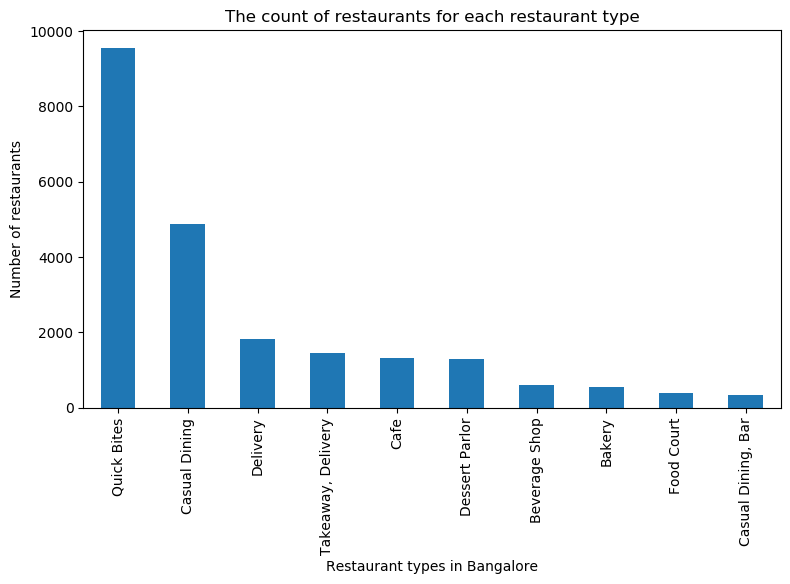

In [215]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The count of restaurants for each restaurant type')
#On x-axis
df_type.groupby('rest_type')['name'].mean().nlargest(10).plot(kind='bar')
plt.xlabel('Restaurant types in Bangalore')
#On y-axis
plt.ylabel('Number of restaurants')
#displays the plot
plt.show()

# Calculate the maximum number of restaurants are of which type in each location

In [216]:
df_locationwisetype=final_df_three.groupby(['location','rest_type']).count().reset_index()

In [217]:
df_locationwisetype.head()

location            rest_type  Unnamed: 0  name  online_order  book_table  \
0      BTM               Bakery          52    52            52          52   
1      BTM  Bakery, Quick Bites           8     8             8           8   
2      BTM                  Bar          16    16            16          16   
3      BTM   Bar, Casual Dining           3     3             3           3   
4      BTM        Beverage Shop         176   176           176         176   

   approx_cost(for two people)  listed_in(city)  latitude  longitude  
0                           52               52        52         52  
1                            8                8         8          8  
2                           16               16        16         16  
3                            3                3         3          3  
4                          176              176       176        176

In [218]:
list_locations=df_locationwisetype['location'].unique().tolist()

In [219]:
df_maxlocationtype=[]
df_type_Res=[]
df_count_type=[]
for i in list_locations:
    df_maxlocationtype.append(df_locationwisetype[df_locationwisetype['name']==df_locationwisetype[df_locationwisetype['location']==i]['name'].max()]['location'].values[0])
    df_type_Res.append(df_locationwisetype[df_locationwisetype['name']==df_locationwisetype[df_locationwisetype['location']==i]['name'].max()]['rest_type'].values[0])
    df_count_type.append(df_locationwisetype[df_locationwisetype['name']==df_locationwisetype[df_locationwisetype['location']==i]['name'].max()]['name'].values[0])


In [220]:
df_count_venuewise=pd.DataFrame({'Location':df_maxlocationtype,'Type_Res':df_type_Res,'Count_Res':df_count_type})

# Maximum restaurants in HSR have delivery option and so does Kormangala 4th block

<Figure size 900x500 with 0 Axes>

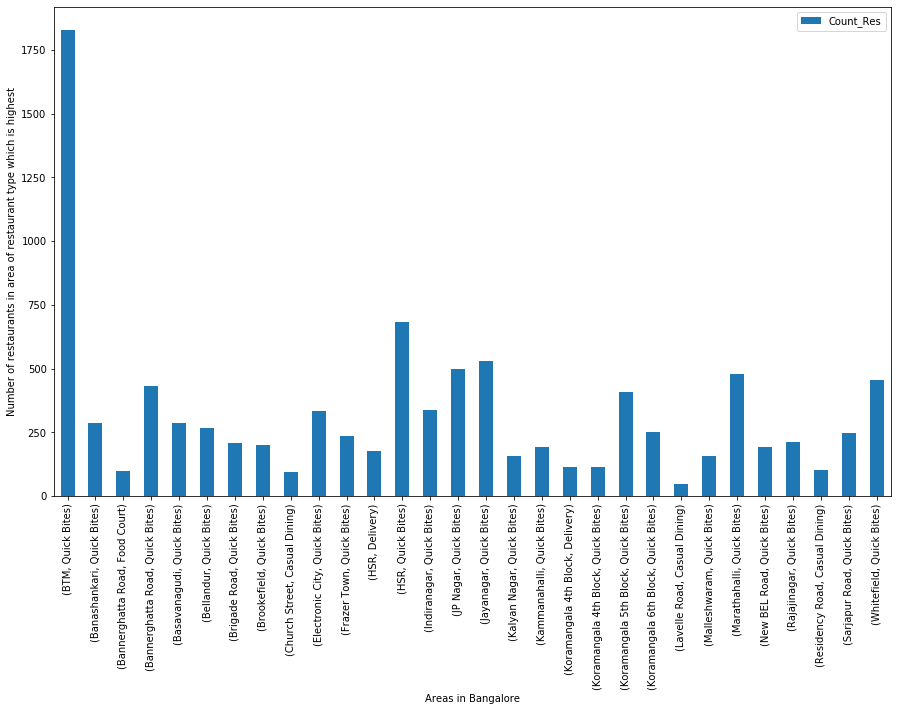

In [222]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
#plt.title('Restaurant type of each location with maximum count ')
#On x-axis
#df_type.groupby('listed_in(type)')['rate'].mean().nlargest(10).plot(kind='bar')
df_count_venuewise.groupby(['Location','Type_Res']).mean().plot(kind='bar')
plt.xlabel('Areas in Bangalore')
#On y-axis
plt.ylabel('Number of restaurants in area of restaurant type which is highest')
#displays the plot
plt.show()

# Calculate the maximum and minimum number of restaurants are in which location

# Maximum restaurants are in BTM and min in Lavelle Road

In [340]:
df_locationwisetype.groupby('location')['name'].sum().sort_values()

location
Lavelle Road              268
Old Airport Road          282
Church Street             290
Rajajinagar               385
Residency Road            398
Brookefield               403
New BEL Road              407
Kammanahalli              420
Malleshwaram              441
Basavanagudi              485
MG Road                   488
Kalyan Nagar              492
Frazer Town               549
Banashankari              566
Koramangala 4th Block     601
Sarjapur Road             664
Koramangala 6th Block     670
Brigade Road              713
Electronic City           747
Koramangala 7th Block     750
Bellandur                 764
Bannerghatta Road        1063
Marathahalli             1182
Jayanagar                1302
Indiranagar              1324
Whitefield               1362
Koramangala 5th Block    1415
JP Nagar                 1462
HSR                      1877
BTM                      3571
Name: name, dtype: int64

# Get the neighbours for all the latitude and longitude using FourSquare API

In [341]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    LIMIT=100
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [342]:
df_coordinates.head()

Unnamed: 0           location   latitude  longitude
0           0       Banashankari  12.915221  77.573598
1           1  Bannerghatta Road  12.826493  77.586473
2           2       Basavanagudi  12.941726  77.575502
3           3          Bellandur  12.979120  77.591300
4           4       Brigade Road  12.973613  77.607472

In [345]:
df_coordinates=pd.read_csv("E:/v5.csv")

In [346]:
df_coordinates.head()

Unnamed: 0           location   latitude  longitude
0           0       Banashankari  12.915221  77.573598
1           1  Bannerghatta Road  12.826493  77.586473
2           2       Basavanagudi  12.941726  77.575502
3           3          Bellandur  12.979120  77.591300
4           4       Brigade Road  12.973613  77.607472

In [355]:
FOURSQUARE_CLIENT_ID = 'MM55S3DJKYRE4NYIKR0XFYKBTDMRURTPCPR5205WBEMHAZCE'
FOURSQUARE_CLIENT_SECRET = 'MFUREVJCY1S0FKIOGFYRHAYRHEFJMJ041CCFLVSXISW0ZBPW'

In [356]:
!conda install -c conda-forge folium=0.5.0

Solving environment: ...working... done

# All requested packages already installed.



In [357]:
CLIENT_ID = 'MM55S3DJKYRE4NYIKR0XFYKBTDMRURTPCPR5205WBEMHAZCE' # Foursquare ID
CLIENT_SECRET = 'MFUREVJCY1S0FKIOGFYRHAYRHEFJMJ041CCFLVSXISW0ZBPW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + 'MM55S3DJKYRE4NYIKR0XFYKBTDMRURTPCPR5205WBEMHAZCE')
print('CLIENT_SECRET:' + 'MFUREVJCY1S0FKIOGFYRHAYRHEFJMJ041CCFLVSXISW0ZBPW')

Your credentails:
CLIENT_ID: MM55S3DJKYRE4NYIKR0XFYKBTDMRURTPCPR5205WBEMHAZCE
CLIENT_SECRET:MFUREVJCY1S0FKIOGFYRHAYRHEFJMJ041CCFLVSXISW0ZBPW


In [358]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude'
                            ]
    
    return(nearby_venues)

In [359]:
import requests

In [360]:
## create a function to repeat the same process to all the Locality in Bangalore

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [361]:
Bangalore_venues = getNearbyVenues(names=df_coordinates['location'],
                                   latitudes=df_coordinates['latitude'],
                                   longitudes=df_coordinates['longitude']
                                  )

Banashankari
Bannerghatta Road
Basavanagudi
Bellandur
Brigade Road
Brookefield
BTM
Church Street
Electronic City
Frazer Town
HSR
Indiranagar
Jayanagar
JP Nagar
Kalyan Nagar
Kammanahalli
Koramangala 4th Block
Koramangala 5th Block
Koramangala 6th Block
Koramangala 7th Block
Lavelle Road
Malleshwaram
Marathahalli
MG Road
New BEL Road
Old Airport Road
Rajajinagar
Residency Road
Sarjapur Road
Whitefield


In [362]:
print(CLIENT_SECRET)

MFUREVJCY1S0FKIOGFYRHAYRHEFJMJ041CCFLVSXISW0ZBPW


In [363]:
Bangalore_venues

Locality  Locality Latitude  Locality Longitude  \
0    Banashankari          12.915221           77.573598   
1    Banashankari          12.915221           77.573598   
2    Banashankari          12.915221           77.573598   
3    Banashankari          12.915221           77.573598   
4    Basavanagudi          12.941726           77.575502   
..            ...                ...                 ...   
583    Whitefield          12.969637           77.749745   
584    Whitefield          12.969637           77.749745   
585    Whitefield          12.969637           77.749745   
586    Whitefield          12.969637           77.749745   
587    Whitefield          12.969637           77.749745   

                              Venue  Venue Latitude  Venue Longitude  \
0            Shivaji Military Hotel       12.917919        77.573925   
1                sri krishna bhavan       12.916939        77.573458   
2        Banashankari Metro Station       12.915297        77.573656   
3                        Wine Baron       12.914515        77.572826   
4                    Rogue Elephant       12.941541        77.577234   
..                              ...             ...              ...   
583             Royal Orchid Suites       12.966774        77.751262   
584  The river side bar and kitchen       12.967298        77.749614   
585                  Reliance Fresh       12.970894        77.750045   
586                      Cheenavala       12.966435        77.749368   
587                         refresh       12.965621        77.749234   

                      Venue Category  
0                  Indian Restaurant  
1    Southern / Soul Food Restaurant  
2                      Metro Station  
3                       Liquor Store  
4                         Restaurant  
..                               ...  
583                            Hotel  
584                        Hotel Bar  
585                 Department Store  
586                Kerala Restaurant  
587                             Café  

[588 rows x 7 columns]

In [367]:
# one hot encoding
venues_type_onehot = pd.get_dummies(Bangalore_venues[['Venue Category']], prefix="", prefix_sep="")

# add the neighborhood column
venues_type_onehot['Neighborhood'] = Bangalore_venues['Locality']
fix_columns = list(venues_type_onehot.columns[-1:]) + list(venues_type_onehot.columns[:-1])
venues_type_onehot = venues_type_onehot[fix_columns]

print(venues_type_onehot.shape)
venues_type_onehot.head()

(588, 126)


Neighborhood  American Restaurant  Andhra Restaurant  Art Gallery  \
0  Banashankari                    0                  0            0   
1  Banashankari                    0                  0            0   
2  Banashankari                    0                  0            0   
3  Banashankari                    0                  0            0   
4  Basavanagudi                    0                  0            0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  BBQ Joint  \
0                    0                 0                   0          0   
1                    0                 0                   0          0   
2                    0                 0                   0          0   
3                    0                 0                   0          0   
4                    0                 0                   0          0   

   Badminton Court  Bakery  ...  Tea Room  Tex-Mex Restaurant  \
0                0       0  ...         0                   0   
1                0       0  ...         0                   0   
2                0       0  ...         0                   0   
3                0       0  ...         0                   0   
4                0       0  ...         0                   0   

   Thai Restaurant  Tibetan Restaurant  Toy / Game Store  Trail  \
0                0                   0                 0      0   
1                0                   0                 0      0   
2                0                   0                 0      0   
3                0                   0                 0      0   
4                0                   0                 0      0   

   Udupi Restaurant  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0                 0                              0                      0   
1                 0                              0                      0   
2                 0                              0                      0   
3                 0                              0                      0   
4                 0                              0                      0   

   Women's Store  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 126 columns]

In [365]:
venues_type_onehot = pd.get_dummies(Bangalore_venues[['Venue Category']], prefix="", prefix_sep="")

In [366]:
venues_type_onehot

American Restaurant  Andhra Restaurant  Art Gallery  Arts & Crafts Store  \
0                      0                  0            0                    0   
1                      0                  0            0                    0   
2                      0                  0            0                    0   
3                      0                  0            0                    0   
4                      0                  0            0                    0   
..                   ...                ...          ...                  ...   
583                    0                  0            0                    0   
584                    0                  0            0                    0   
585                    0                  0            0                    0   
586                    0                  0            0                    0   
587                    0                  0            0                    0   

     Asian Restaurant  Athletics & Sports  BBQ Joint  Badminton Court  Bakery  \
0                   0                   0          0                0       0   
1                   0                   0          0                0       0   
2                   0                   0          0                0       0   
3                   0                   0          0                0       0   
4                   0                   0          0                0       0   
..                ...                 ...        ...              ...     ...   
583                 0                   0          0                0       0   
584                 0                   0          0                0       0   
585                 0                   0          0                0       0   
586                 0                   0          0                0       0   
587                 0                   0          0                0       0   

     Bar  ...  Tea Room  Tex-Mex Restaurant  Thai Restaurant  \
0      0  ...         0                   0                0   
1      0  ...         0                   0                0   
2      0  ...         0                   0                0   
3      0  ...         0                   0                0   
4      0  ...         0                   0                0   
..   ...  ...       ...                 ...              ...   
583    0  ...         0                   0                0   
584    0  ...         0                   0                0   
585    0  ...         0                   0                0   
586    0  ...         0                   0                0   
587    0  ...         0                   0                0   

     Tibetan Restaurant  Toy / Game Store  Trail  Udupi Restaurant  \
0                     0                 0      0                 0   
1                     0                 0      0                 0   
2                     0                 0      0                 0   
3                     0                 0      0                 0   
4                     0                 0      0                 0   
..                  ...               ...    ...               ...   
583                   0                 0      0                 0   
584                   0                 0      0                 0   
585                   0                 0      0                 0   
586                   0                 0      0                 0   
587                   0                 0      0                 0   

     Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Women's Store  
0                                0                      0              0  
1                                0                      0              0  
2                                0                      0              0  
3                                0                      0              0  
4                                0                      0              0  

In [368]:
# get the common occurrence average of each venue type in each neighborhood
venue_count_df = venues_type_onehot.groupby(['Neighborhood']).mean().reset_index()

print(venue_count_df.shape)
venue_count_df.head()

(26, 126)


Neighborhood  American Restaurant  Andhra Restaurant  Art Gallery  \
0           BTM                 0.00               0.00         0.00   
1  Banashankari                 0.00               0.00         0.00   
2  Basavanagudi                 0.00               0.00         0.00   
3     Bellandur                 0.00               0.00         0.00   
4  Brigade Road                 0.01               0.01         0.01   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  BBQ Joint  \
0                 0.00               0.0            0.000000        0.0   
1                 0.00               0.0            0.000000        0.0   
2                 0.00               0.0            0.071429        0.0   
3                 0.00               0.0            0.000000        0.0   
4                 0.01               0.0            0.000000        0.0   

   Badminton Court    Bakery  ...  Tea Room  Tex-Mex Restaurant  \
0              0.0  0.153846  ...  0.000000                 0.0   
1              0.0  0.000000  ...  0.000000                 0.0   
2              0.0  0.000000  ...  0.071429                 0.0   
3              0.0  0.000000  ...  0.000000                 0.0   
4              0.0  0.010000  ...  0.000000                 0.0   

   Thai Restaurant  Tibetan Restaurant  Toy / Game Store  Trail  \
0             0.00                0.00               0.0    0.0   
1             0.00                0.00               0.0    0.0   
2             0.00                0.00               0.0    0.0   
3             0.00                0.00               0.0    0.0   
4             0.01                0.01               0.0    0.0   

   Udupi Restaurant  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0               0.0                       0.076923                    0.0   
1               0.0                       0.000000                    0.0   
2               0.0                       0.000000                    0.0   
3               0.0                       0.000000                    0.0   
4               0.0                       0.010000                    0.0   

   Women's Store  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  

[5 rows x 126 columns]

In [369]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in venue_count_df['Neighborhood']:
    print("----"+hood+"----")
    temp = venue_count_df[venue_count_df['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BTM----
              venue  freq
0       Snack Place  0.15
1            Bakery  0.15
2  Department Store  0.08
3              Café  0.08
4     Shopping Mall  0.08


----Banashankari----
                             venue  freq
0                Indian Restaurant  0.25
1  Southern / Soul Food Restaurant  0.25
2                     Liquor Store  0.25
3                    Metro Station  0.25
4                         Pharmacy  0.00


----Basavanagudi----
                      venue  freq
0         Indian Restaurant  0.21
1                Restaurant  0.14
2                  Tea Room  0.07
3  Mediterranean Restaurant  0.07
4                Hookah Bar  0.07


----Bellandur----
               venue  freq
0  Indian Restaurant  0.17
1               Park  0.17
2     Sandwich Place  0.17
3              Hotel  0.17
4   Capitol Building  0.17


----Brigade Road----
               venue  freq
0  Indian Restaurant  0.12
1               Café  0.11
2                Pub  0.08
3                Bar  0

In [370]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [371]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Neighborhood'] = venue_count_df['Neighborhood']

for ind in np.arange(venue_count_df.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venue_count_df.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Neighborhood 1st Most Common Venue  \
0                     BTM                Bakery   
1            Banashankari     Indian Restaurant   
2            Basavanagudi     Indian Restaurant   
3               Bellandur     Indian Restaurant   
4            Brigade Road     Indian Restaurant   
5             Brookefield     Indian Restaurant   
6           Church Street     Indian Restaurant   
7         Electronic City     Indian Restaurant   
8             Frazer Town     Indian Restaurant   
9                     HSR     Indian Restaurant   
10            Indiranagar                   Pub   
11               JP Nagar      Department Store   
12              Jayanagar     Indian Restaurant   
13           Kalyan Nagar     Indian Restaurant   
14           Kammanahalli            Food Truck   
15  Koramangala 4th Block     Indian Restaurant   
16           Lavelle Road        Ice Cream Shop   
17                MG Road     Indian Restaurant   
18           Malleshwaram     Indian Restaurant   
19           Marathahalli     Indian Restaurant   
20           New BEL Road     Indian Restaurant   
21       Old Airport Road     Indian Restaurant   
22            Rajajinagar     Indian Restaurant   
23         Residency Road  Fast Food Restaurant   
24          Sarjapur Road             Gastropub   
25             Whitefield                Bakery   

            2nd Most Common Venue          3rd Most Common Venue  \
0                     Snack Place              Indian Restaurant   
1                    Liquor Store                  Metro Station   
2                      Restaurant                       Tea Room   
3                  Sandwich Place               Capitol Building   
4                            Café                            Pub   
5            Fast Food Restaurant                         Bakery   
6            Fast Food Restaurant                     Food Truck   
7                  Sandwich Place               Capitol Building   
8                  Ice Cream Shop      Middle Eastern Restaurant   
9                            Café                    Snack Place   
10                         Lounge              Indian Restaurant   
11              Indian Restaurant           Fast Food Restaurant   
12                           Café                      Juice Bar   
13           Fast Food Restaurant                      BBQ Joint   
14                  Women's Store           Fast Food Restaurant   
15                 Clothing Store             Italian Restaurant   
16              Indian Restaurant                          Plaza   
17             Chinese Restaurant                        Brewery   
18  Vegetarian / Vegan Restaurant                    Coffee Shop   
19                 Clothing Store  Vegetarian / Vegan Restaurant   
20                       Tea Room                     Shoe Store   
21             Chinese Restaurant                     Sports Bar   
22                 Breakfast Spot                         Bakery   
23              Indian Restaurant                 Sandwich Place   
24                           Park                            Spa   
25    Eastern European Restaurant                      Hotel Bar   

              4th Most Common Venue 5th Most Common Venue  \
0                    Ice Cream Shop    Chinese Restaurant   
1   Southern / Soul Food Restaurant            Hookah Bar   
2                              Café           Snack Place   
3                        Restaurant                  Park   
4                            Lounge                   Bar   
5                    Ice Cream Shop      Department Store   
6                     Grocery Store          Dessert Shop   
7                        Restaurant                  Park   
8                          Tea Room  Fast Food Restaurant   
9                      Burger Joint    Seafood Restaurant   
10                     Cupcake Shop                  Café   
11                   Boarding House                Bakery   
12   

# Cluster Locality
Run k-means to cluster the Locality into 5 clusters according to venue types

In [372]:
# set number of clusters
kclusters = 5

Bangalore_clustering = venue_count_df.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bangalore_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_

In [373]:
venue_count_df["Clus_km"] = labels

In [374]:
venue_count_df.head()

Neighborhood  American Restaurant  Andhra Restaurant  Art Gallery  \
0           BTM                 0.00               0.00         0.00   
1  Banashankari                 0.00               0.00         0.00   
2  Basavanagudi                 0.00               0.00         0.00   
3     Bellandur                 0.00               0.00         0.00   
4  Brigade Road                 0.01               0.01         0.01   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  BBQ Joint  \
0                 0.00               0.0            0.000000        0.0   
1                 0.00               0.0            0.000000        0.0   
2                 0.00               0.0            0.071429        0.0   
3                 0.00               0.0            0.000000        0.0   
4                 0.01               0.0            0.000000        0.0   

   Badminton Court    Bakery  ...  Tex-Mex Restaurant  Thai Restaurant  \
0              0.0  0.153846  ...                 0.0             0.00   
1              0.0  0.000000  ...                 0.0             0.00   
2              0.0  0.000000  ...                 0.0             0.00   
3              0.0  0.000000  ...                 0.0             0.00   
4              0.0  0.010000  ...                 0.0             0.01   

   Tibetan Restaurant  Toy / Game Store  Trail  Udupi Restaurant  \
0                0.00               0.0    0.0               0.0   
1                0.00               0.0    0.0               0.0   
2                0.00               0.0    0.0               0.0   
3                0.00               0.0    0.0               0.0   
4                0.01               0.0    0.0               0.0   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Women's Store  \
0                       0.076923                    0.0            0.0   
1                       0.000000                    0.0            0.0   
2                       0.000000                    0.0            0.0   
3                       0.000000                    0.0            0.0   
4                       0.010000                    0.0            0.0   

   Clus_km  
0        3  
1        0  
2        0  
3        4  
4        3  

[5 rows x 127 columns]

In [375]:
venue_clusters=venue_count_df.merge(df_coordinates,left_on='Neighborhood',right_on='location')

In [376]:
venue_clusters.head()

Neighborhood  American Restaurant  Andhra Restaurant  Art Gallery  \
0           BTM                 0.00               0.00         0.00   
1  Banashankari                 0.00               0.00         0.00   
2  Basavanagudi                 0.00               0.00         0.00   
3     Bellandur                 0.00               0.00         0.00   
4  Brigade Road                 0.01               0.01         0.01   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  BBQ Joint  \
0                 0.00               0.0            0.000000        0.0   
1                 0.00               0.0            0.000000        0.0   
2                 0.00               0.0            0.071429        0.0   
3                 0.00               0.0            0.000000        0.0   
4                 0.01               0.0            0.000000        0.0   

   Badminton Court    Bakery  ...  Trail  Udupi Restaurant  \
0              0.0  0.153846  ...    0.0               0.0   
1              0.0  0.000000  ...    0.0               0.0   
2              0.0  0.000000  ...    0.0               0.0   
3              0.0  0.000000  ...    0.0               0.0   
4              0.0  0.010000  ...    0.0               0.0   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  Women's Store  \
0                       0.076923                    0.0            0.0   
1                       0.000000                    0.0            0.0   
2                       0.000000                    0.0            0.0   
3                       0.000000                    0.0            0.0   
4                       0.010000                    0.0            0.0   

   Clus_km  Unnamed: 0      location   latitude  longitude  
0        3           6           BTM  12.911276  77.604565  
1        0           0  Banashankari  12.915221  77.573598  
2        0           2  Basavanagudi  12.941726  77.575502  
3        4           3     Bellandur  12.979120  77.591300  
4        3           4  Brigade Road  12.973613  77.607472  

[5 rows x 131 columns]

In [377]:
Locality_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0           BTM                Bakery           Snack Place   
1  Banashankari     Indian Restaurant          Liquor Store   
2  Basavanagudi     Indian Restaurant            Restaurant   
3     Bellandur     Indian Restaurant        Sandwich Place   
4  Brigade Road     Indian Restaurant                  Café   

  3rd Most Common Venue            4th Most Common Venue  \
0     Indian Restaurant                   Ice Cream Shop   
1         Metro Station  Southern / Soul Food Restaurant   
2              Tea Room                             Café   
3      Capitol Building                       Restaurant   
4                   Pub                           Lounge   

  5th Most Common Venue     6th Most Common Venue 7th Most Common Venue  \
0    Chinese Restaurant          Department Store                  Café   
1            Hookah Bar      Gym / Fitness Center        Cosmetics Shop   
2           Snack Place  Mediterranean Restaurant         Metro Station   
3                  Park                     Hotel  Gym / Fitness Center   
4                   Bar        Chinese Restaurant           Coffee Shop   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0         Shopping Mall  Fast Food Restaurant            Coffee Shop  
1        Cricket Ground          Cupcake Shop          Deli / Bodega  
2     Convenience Store    Athletics & Sports             Hookah Bar  
3                   Gym     Convenience Store         Cosmetics Shop  
4                 Hotel             Bookstore         Clothing Store

In [378]:
venue_clustered=venue_clusters[['Neighborhood','Clus_km','location','latitude','longitude']]

In [379]:
cluster_tovisualize=venue_clustered.merge(Locality_venues_sorted,left_on='Neighborhood',right_on='Neighborhood')

In [380]:
cluster_tovisualize.head()

Neighborhood  Clus_km      location   latitude  longitude  \
0           BTM        3           BTM  12.911276  77.604565   
1  Banashankari        0  Banashankari  12.915221  77.573598   
2  Basavanagudi        0  Basavanagudi  12.941726  77.575502   
3     Bellandur        4     Bellandur  12.979120  77.591300   
4  Brigade Road        3  Brigade Road  12.973613  77.607472   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                Bakery           Snack Place     Indian Restaurant   
1     Indian Restaurant          Liquor Store         Metro Station   
2     Indian Restaurant            Restaurant              Tea Room   
3     Indian Restaurant        Sandwich Place      Capitol Building   
4     Indian Restaurant                  Café                   Pub   

             4th Most Common Venue 5th Most Common Venue  \
0                   Ice Cream Shop    Chinese Restaurant   
1  Southern / Soul Food Restaurant            Hookah Bar   
2                             Café           Snack Place   
3                       Restaurant                  Park   
4                           Lounge                   Bar   

      6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0          Department Store                  Café         Shopping Mall   
1      Gym / Fitness Center        Cosmetics Shop        Cricket Ground   
2  Mediterranean Restaurant         Metro Station     Convenience Store   
3                     Hotel  Gym / Fitness Center                   Gym   
4        Chinese Restaurant           Coffee Shop                 Hotel   

  9th Most Common Venue 10th Most Common Venue  
0  Fast Food Restaurant            Coffee Shop  
1          Cupcake Shop          Deli / Bodega  
2    Athletics & Sports             Hookah Bar  
3     Convenience Store         Cosmetics Shop  
4             Bookstore         Clothing Store

In [382]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [383]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cluster_tovisualize['latitude'], cluster_tovisualize['longitude'], cluster_tovisualize['Neighborhood'], cluster_tovisualize['Clus_km']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine clusters

In [384]:
cluster_tovisualize.head()

Neighborhood  Clus_km      location   latitude  longitude  \
0           BTM        3           BTM  12.911276  77.604565   
1  Banashankari        0  Banashankari  12.915221  77.573598   
2  Basavanagudi        0  Basavanagudi  12.941726  77.575502   
3     Bellandur        4     Bellandur  12.979120  77.591300   
4  Brigade Road        3  Brigade Road  12.973613  77.607472   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0                Bakery           Snack Place     Indian Restaurant   
1     Indian Restaurant          Liquor Store         Metro Station   
2     Indian Restaurant            Restaurant              Tea Room   
3     Indian Restaurant        Sandwich Place      Capitol Building   
4     Indian Restaurant                  Café                   Pub   

             4th Most Common Venue 5th Most Common Venue  \
0                   Ice Cream Shop    Chinese Restaurant   
1  Southern / Soul Food Restaurant            Hookah Bar   
2                             Café           Snack Place   
3                       Restaurant                  Park   
4                           Lounge                   Bar   

      6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0          Department Store                  Café         Shopping Mall   
1      Gym / Fitness Center        Cosmetics Shop        Cricket Ground   
2  Mediterranean Restaurant         Metro Station     Convenience Store   
3                     Hotel  Gym / Fitness Center                   Gym   
4        Chinese Restaurant           Coffee Shop                 Hotel   

  9th Most Common Venue 10th Most Common Venue  
0  Fast Food Restaurant            Coffee Shop  
1          Cupcake Shop          Deli / Bodega  
2    Athletics & Sports             Hookah Bar  
3     Convenience Store         Cosmetics Shop  
4             Bookstore         Clothing Store

### Cluster 0

Indian Restuarants and Gym/fitness centres are the most recommended venues near these locations

In [386]:
cluster_tovisualize[cluster_tovisualize['Clus_km']==0]['Neighborhood'].unique()

array(['Banashankari', 'Basavanagudi', 'Brookefield', 'Church Street',
       'Frazer Town', 'HSR', 'JP Nagar', 'Jayanagar', 'MG Road',
       'Malleshwaram', 'Marathahalli', 'New BEL Road', 'Old Airport Road',
       'Rajajinagar', 'Residency Road'], dtype=object)

In [387]:
cluster_tovisualize.loc[cluster_tovisualize['Clus_km'] == 0, cluster_tovisualize.columns[[1] + list(range(5, cluster_tovisualize.shape[1]))]]


Clus_km 1st Most Common Venue          2nd Most Common Venue  \
1         0     Indian Restaurant                   Liquor Store   
2         0     Indian Restaurant                     Restaurant   
5         0     Indian Restaurant           Fast Food Restaurant   
6         0     Indian Restaurant           Fast Food Restaurant   
8         0     Indian Restaurant                 Ice Cream Shop   
9         0     Indian Restaurant                           Café   
11        0      Department Store              Indian Restaurant   
12        0     Indian Restaurant                           Café   
17        0     Indian Restaurant             Chinese Restaurant   
18        0     Indian Restaurant  Vegetarian / Vegan Restaurant   
19        0     Indian Restaurant                 Clothing Store   
20        0     Indian Restaurant                       Tea Room   
21        0     Indian Restaurant             Chinese Restaurant   
22        0     Indian Restaurant                 Breakfast Spot   
23        0  Fast Food Restaurant              Indian Restaurant   

            3rd Most Common Venue            4th Most Common Venue  \
1                   Metro Station  Southern / Soul Food Restaurant   
2                        Tea Room                             Café   
5                          Bakery                   Ice Cream Shop   
6                      Food Truck                    Grocery Store   
8       Middle Eastern Restaurant                         Tea Room   
9                     Snack Place                     Burger Joint   
11           Fast Food Restaurant                   Boarding House   
12                      Juice Bar               Chinese Restaurant   
17                        Brewery                        Bookstore   
18                    Coffee Shop                   Ice Cream Shop   
19  Vegetarian / Vegan Restaurant                           Bakery   
20                     Shoe Store                             Café   
21                     Sports Bar                             Café   
22                         Bakery                  Motorcycle Shop   
23                 Sandwich Place                      Pizza Place   

   5th Most Common Venue        6th Most Common Venue  \
1             Hookah Bar         Gym / Fitness Center   
2            Snack Place     Mediterranean Restaurant   
5       Department Store                 Dessert Shop   
6           Dessert Shop         Karnataka Restaurant   
8   Fast Food Restaurant                  Pizza Place   
9     Seafood Restaurant                  Bus Station   
11                Bakery                      Brewery   
12        Sandwich Place                       Bakery   
17                 Hotel                   Donut Shop   
18           Snack Place      South Indian Restaurant   
19    Chinese Restaurant                Movie Theater   
20          Liquor Store  Eastern European Restaurant   
21                   Pub                   Restaurant   
22     Mobile Phone Shop               Cricket Ground   
23    Chinese Restaurant                    Cafeteria   

       7th Most Common Venue 8th Most Common Venue  \
1             Cosmetics Shop        Cricket Ground   
2              Metro Station     Convenience Store   
5                  Multiplex    Salon / Barbershop   
6               Cupcake Shop         Deli / Bodega   
8         Seafood Restaurant           Snack Place   
9   Maharashtrian Restaurant          Liquor Store   
11              Dessert Shop                 Diner   
12      Fast Food Restaurant            Restaurant   
17              Dessert Shop     Paella Restaurant   
18                      Café          Camera Store   
19   South Indian Restaurant                Lounge   
20       Dumpling Restaurant            Donut Shop   
21                Shoe Store         Burrito Place   
22              Cupcake Shop         Deli / Bodega   
23                      Café            Donut Shop   

         9th Mos

# Cluster 1
Diners are the most recommended venues near these locations

In [388]:
cluster_tovisualize[cluster_tovisualize['Clus_km']==1]['Neighborhood'].unique()

array(['Kammanahalli'], dtype=object)

In [389]:
cluster_tovisualize.loc[cluster_tovisualize['Clus_km'] == 1, cluster_tovisualize.columns[[1] + list(range(5, cluster_tovisualize.shape[1]))]]

Clus_km 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
14        1            Food Truck         Women's Store  Fast Food Restaurant   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
14     Convenience Store        Cosmetics Shop        Cricket Ground   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
14          Cupcake Shop         Deli / Bodega      Department Store   

   10th Most Common Venue  
14           Dessert Shop

# Cluster 2

# Cafes are the most recommended venues near these locations

In [391]:
cluster_tovisualize[cluster_tovisualize['Clus_km']==2]['Neighborhood'].unique()

array(['Sarjapur Road'], dtype=object)

In [392]:
cluster_tovisualize.loc[cluster_tovisualize['Clus_km'] == 2, cluster_tovisualize.columns[[1] + list(range(5, cluster_tovisualize.shape[1]))]]

Clus_km 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
24        2             Gastropub                  Park                   Spa   

   4th Most Common Venue 5th Most Common Venue        6th Most Common Venue  \
24             Bookstore          Dessert Shop  Eastern European Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
24   Dumpling Restaurant            Donut Shop                 Diner   

   10th Most Common Venue  
24          Women's Store

# Cluster 3

# Sports Bar are the most recommended venues near these locations

In [394]:
cluster_tovisualize[cluster_tovisualize['Clus_km']==3]['Neighborhood'].unique()

array(['BTM', 'Brigade Road', 'Indiranagar', 'Kalyan Nagar',
       'Koramangala 4th Block', 'Lavelle Road', 'Whitefield'],
      dtype=object)

In [395]:
cluster_tovisualize.loc[cluster_tovisualize['Clus_km'] == 3, cluster_tovisualize.columns[[1] + list(range(5, cluster_tovisualize.shape[1]))]]

Clus_km 1st Most Common Venue        2nd Most Common Venue  \
0         3                Bakery                  Snack Place   
4         3     Indian Restaurant                         Café   
10        3                   Pub                       Lounge   
13        3     Indian Restaurant         Fast Food Restaurant   
15        3     Indian Restaurant               Clothing Store   
16        3        Ice Cream Shop            Indian Restaurant   
25        3                Bakery  Eastern European Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0      Indian Restaurant        Ice Cream Shop    Chinese Restaurant   
4                    Pub                Lounge                   Bar   
10     Indian Restaurant          Cupcake Shop                  Café   
13             BBQ Joint        Ice Cream Shop                  Café   
15    Italian Restaurant                  Café                   Bar   
16                 Plaza                   Pub        Breakfast Spot   
25             Hotel Bar                 Hotel     Kerala Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0       Department Store                  Café         Shopping Mall   
4     Chinese Restaurant           Coffee Shop                 Hotel   
10          Cocktail Bar                Bakery            Restaurant   
13     Korean Restaurant            Restaurant           Coffee Shop   
15           Coffee Shop    Chinese Restaurant           Pizza Place   
16           Art Gallery               Brewery       Bubble Tea Shop   
25  Gym / Fitness Center                  Café      Department Store   

    9th Most Common Venue 10th Most Common Venue  
0    Fast Food Restaurant            Coffee Shop  
4               Bookstore         Clothing Store  
10     Italian Restaurant         Ice Cream Shop  
13      Electronics Store                 Lounge  
15  Hyderabadi Restaurant         Ice Cream Shop  
16           Burger Joint     Chinese Restaurant  
25                  Diner    Dumpling Restaurant

# Cluster 4

# Indian Restuarants and Cafes are the most recommended venues near these locations

In [397]:
cluster_tovisualize[cluster_tovisualize['Clus_km']==4]['Neighborhood'].unique()

array(['Bellandur', 'Electronic City'], dtype=object)

In [398]:
cluster_tovisualize.loc[cluster_tovisualize['Clus_km'] == 4, cluster_tovisualize.columns[[1] + list(range(5, cluster_tovisualize.shape[1]))]]

Clus_km 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
3        4     Indian Restaurant        Sandwich Place      Capitol Building   
7        4     Indian Restaurant        Sandwich Place      Capitol Building   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
3            Restaurant                  Park                 Hotel   
7            Restaurant                  Park                 Hotel   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
3  Gym / Fitness Center                   Gym     Convenience Store   
7  Gym / Fitness Center                   Gym     Convenience Store   

  10th Most Common Venue  
3         Cosmetics Shop  
7         Cosmetics Shop

## Results and Discussion 

Our analysis shows that there are huge number of restaurants in Bangalore and food culture is very prominent across different locations/neighbourhoods of Bangalore. Analysing the **online ordering option** availabilty for restaurants across Bangalore, we realised that there are **48%** restaurants which have online delivery available through Zomato. Next, we decided to seek a relationship between the availability of **delivery option and rating** of the restaurant. It was observed that the restaurant with online delivery option is likely to get a higher user rating.
Next, analysing the **booking table option** through Zomato app, we found that **9.2%** out of total have a booking option available.Further, there is a **positive correlation** between the booking option and the restaurant rating. This insight can be utilised by the restaurant owners that if they keep the booking table option on the app, they will get better ratings due to **better customer experience** with reduced waiting time.
Next, we analysed the restaurant chains with **maximum venues** across Bangalore. Out of which **Cafe Coffee Day** had close to **60 venues** across the city being the highest, followed by **Baskin Robbins**. This insight can be utilised by people who want to invest and open a currently established food chain and see the popularity.
Next, cost for two people was analysed across the restaurants. **The Leela Palace** was the costliest with cost of  around **6000 Rupees** for two people followed by **Raddison Blue** with 5500 and **JW Marriott** with 4000 cost.
Cheapest were analysed with the lowest being **Bread and Better** and **Funky Food**.
Next, analysis was done to identify neighbourhoods with the highest rated restaurants in the city. **Lavelle Road**
topped the list having highest rated restaurants in Bangalore and can be a go-to option for foodies to explore the highest rated restaurants.
Next, analysis was done to identify the **restaurant type** which is most popular across Bangalore. **Quick Bites** type of restaurants were most in number, followed by **casual dining**. Also **Desert serving places** were more than **bars** across the city.
Next, analysis was done for all neighbourhooods to identify the **most popular restaurant type in each area**.
It was found out that **HSR and Kormangala** have maximum **delivery** options available compared to other restaurants in the area. This is a useful insight for foodies for them to decide their living place basis the popularity of restaurant types available nearby.
Also, we found out the places with the **maximum restaurants in the city** which was **BTM**. This is expected as BTM is majorly occupied by bachelors and hence the largest number of eating joints. On the other hand, **minimum restaurants in city** were in **Lavelle Road**.
After this, the city was divided into clusters basis the nearby venues in the locality/neighbourhood through k-means clustering. We found that there were similar neighbourhoods which could be clustered together basis the nearby venues. The result was that the city was divided into five clusters.**Indian Restaurants and Gym/fitness centres** were the most common venues near the **Cluster 1** which were the  similar locations like Brigade Road, M.G Road.
Similarly, insights were drawn for **Cluster 2** where **Diners** were the most common, **Cluster 3** where **Cafes** were recommended ,**Cluster 4** where Sports Bar are popular and **Cluster 5** with **Cafes and Indian Restaurants** in areas like Marathahalli and HSR.